In [1]:
import os
import pandas as pd

In [2]:
# Importamos los datos
data = pd.read_csv("Datos_coches_numerico.csv")  # O usa la ruta completa si es necesario

In [3]:
data = data.dropna(axis=0)
# Comprobamos que no hay valores perdidos.
data.isnull().sum()
# Con esta funcion vemos si existen (TRUE) o no (FALSE) datos perdidos
data.isnull().any().any()

np.False_

In [4]:
data.columns

Index(['Unnamed: 0', 'Precio', 'Título', 'Combustible', 'Año', 'kilometraje',
       'Cambio', 'Potencia', 'B'],
      dtype='object')

In [21]:
# El primer paso es conocer nuestros datos.
# Realizamos una primera visualizacion.
import matplotlib.pyplot as plt
import seaborn as sns
print(data)

      Precio   Año  kilometraje      Cambio  Potencia  Diésel  Eléctrico  \
0      11999  2017       158000      Manual       110    True      False   
1       6999  2012       166000      Manual       115   False      False   
2       4500  2010       212580      Manual       110    True      False   
3       4999  2013       316000  Automático       175    True      False   
4       5800  2017       233000      Manual        75    True      False   
...      ...   ...          ...         ...       ...     ...        ...   
1956    1700  2004       380000      Manual       120    True      False   
1958   12900  2017       134000      Manual       130    True      False   
1959    6550  2006       300317      Manual       110    True      False   
1960   14790  2020        79447      Manual        90    True      False   
1961   11990  2019        60000      Manual       100   False      False   

      Gasolina  Hybrid  Otros  
0        False   False  False  
1         True   False 

In [23]:
# La columna 'Combustible' ya ha sido codificada previamente. No es necesario repetir este paso.

In [8]:
data["Cambio"].replace("Automático", 1, inplace=True)
data["Cambio"].replace("Manual", 0, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13268\957507286.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Cambio"].replace("Automático", 1, inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13268\957507286.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [24]:
# Visualizamos los 10 primero datos, de una manera mas comoda.
data.head(n=10)

,Precio,Año,kilometraje,Cambio,Potencia,Diésel,Eléctrico,Gasolina,Hybrid,Otros
0,11999,2017,158000,Manual,110,True,False,False,False,False
1,6999,2012,166000,Manual,115,False,False,True,False,False
2,4500,2010,212580,Manual,110,True,False,False,False,False
3,4999,2013,316000,Automático,175,True,False,False,False,False
4,5800,2017,233000,Manual,75,True,False,False,False,False
5,5999,2014,250000,Manual,110,True,False,False,False,False
6,9900,2019,115000,Manual,115,True,False,False,False,False
7,22000,2022,35000,Manual,110,True,False,False,False,False
8,3500,2004,152000,Manual,80,True,False,False,False,False
9,8300,2019,114031,Manual,90,True,False,False,False,False


In [25]:
# Realizamos un resumen estadistico de las variables.
descripcion = data.describe(include="all").T

In [26]:
descripcion

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Precio,1222.0,NaN,NaN,NaN,11373.783961,7424.900837,0.0,4500.0,11490.0,15990.0,44900.0
Año,1222.0,NaN,NaN,NaN,2014.827332,6.340887,1997.0,2009.0,2017.0,2019.0,2024.0
kilometraje,1222.0,NaN,NaN,NaN,165243.246318,969903.965179,1.0,60505.5,103764.5,180000.0,33400000.0
Cambio,1222,2,Manual,1035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Potencia,1222.0,NaN,NaN,NaN,114.042553,31.409188,13.0,90.0,110.0,130.0,300.0
Diésel,1222,2,True,748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eléctrico,1222,2,False,1190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gasolina,1222,2,False,817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hybrid,1222,2,False,1202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Otros,1222,2,False,1205,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1839 entries, 0 to 1961
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1839 non-null   int64 
 1   Precio       1839 non-null   int64 
 2   Título       1839 non-null   object
 3   Año          1839 non-null   int64 
 4   kilometraje  1839 non-null   int64 
 5   Cambio       1839 non-null   int64 
 6   Potencia     1839 non-null   int64 
 7   Diésel       1839 non-null   bool  
 8   Eléctrico    1839 non-null   bool  
 9   Gasolina     1839 non-null   bool  
 10  Hybrid       1839 non-null   bool  
 11  Otros        1839 non-null   bool  
dtypes: bool(5), int64(6), object(1)
memory usage: 123.9+ KB


Intentamos "limitar" nuestro estudio a los datos para los que tiene sentido hacer un modelo de predicción

In [31]:
# Quitar los que no son renault
# (¡Mueve este bloque antes de eliminar la columna 'Título'!)
if "Título" in data.columns:
	data = data[data["Título"].str.contains("renault", case=False, na=False)]
	print(f"Filtrado por Renault. Registros restantes: {len(data)}")
else:
	print("La columna 'Título' ya no existe en el DataFrame.")
	print("El filtro por marca Renault ya se aplicó anteriormente o la columna fue eliminada.")

La columna 'Título' ya no existe en el DataFrame.
El filtro por marca Renault ya se aplicó anteriormente o la columna fue eliminada.


In [32]:
# Quedarnos con los precios entre 1000 y 25000
data = data[data['Precio'].between(1000, 25000)]
# kilómetros entre 1000 y 300000
data = data[data['kilometraje'].between(1000, 300000)]

In [33]:
data = data[data["Año"] > 1995]
data = data[data["Potencia"] < 450]

In [35]:
# Eliminar columnas innecesarias si existen
columns_to_drop = ['Título', 'Unnamed: 0']
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]

if existing_columns_to_drop:
    data = data.drop(existing_columns_to_drop, axis=1)
    print(f"Columnas eliminadas: {existing_columns_to_drop}")
else:
    print("Las columnas 'Título' y 'Unnamed: 0' ya fueron eliminadas anteriormente.")

print(f"Columnas restantes: {list(data.columns)}")

Las columnas 'Título' y 'Unnamed: 0' ya fueron eliminadas anteriormente.
Columnas restantes: ['Precio', 'Año', 'kilometraje', 'Cambio', 'Potencia', 'Diésel', 'Eléctrico', 'Gasolina', 'Hybrid', 'Otros']


In [36]:
data = data.drop('Otros', axis=1)

In [37]:
len(data)

1056

Una vez que comprobamos que los datos son correctos pasamos a la modelizacion, utilizando tecnicas de machine learning.

Cuando realizamos un modelo predictivo es necesario conocer la fiabilidad esperada con datos futuros.

Para ello podemos hacer una particion y utilizar unos datos para entrenar el modelo (train) y otros para comprobar la fiabilidad (test).

# Representaciones gráficas de los datos

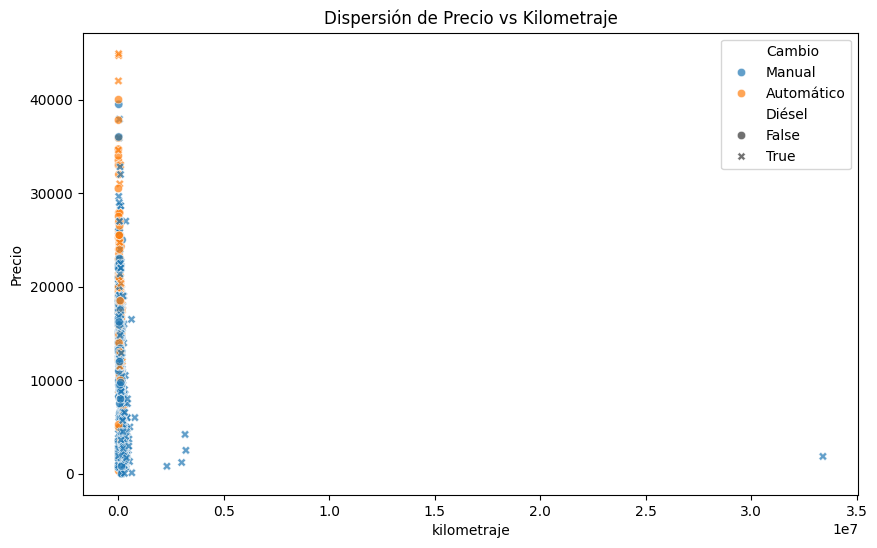

In [18]:
# grafico de dispersión
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='kilometraje', y='Precio', hue='Cambio', style='Diésel', alpha=0.7)
plt.title('Dispersión de Precio vs Kilometraje')
plt.show()

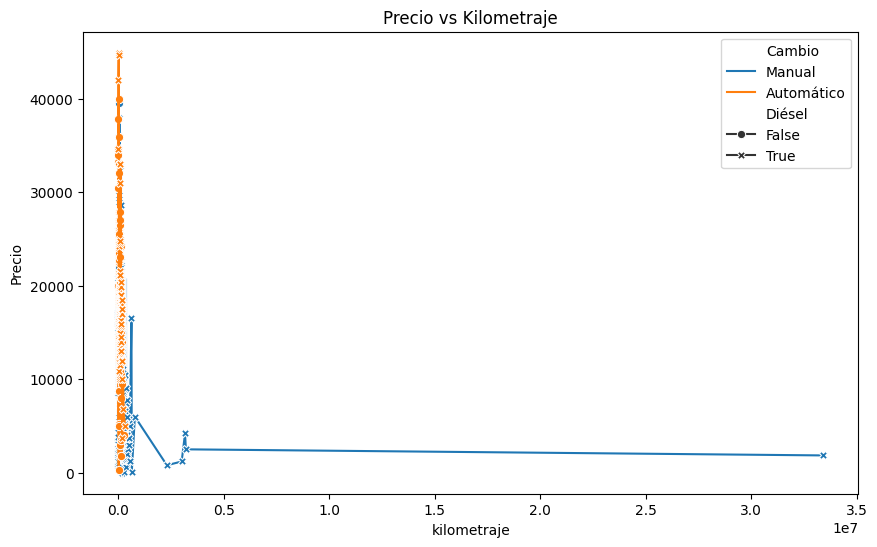

In [19]:
# generar grafico lineal
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='kilometraje', y='Precio', hue='Cambio', style='Diésel', markers=True, dashes=False)
plt.title('Precio vs Kilometraje')
plt.show()

=== MÉTRICAS DEL CONJUNTO DE ENTRENAMIENTO (TRAIN) ===
MAE Train: 1866.71
MSE Train: 6035715.60
R² Train: 0.8294

=== MÉTRICAS DEL CONJUNTO DE PRUEBA (TEST) ===
MAE Test: 1766.60
MSE Test: 5816672.27
R² Test: 0.8329

=== COMPARACIÓN TRAIN vs TEST ===
Diferencia R² (Train - Test): -0.0035
✅ Buen ajuste: diferencia pequeña entre train y test


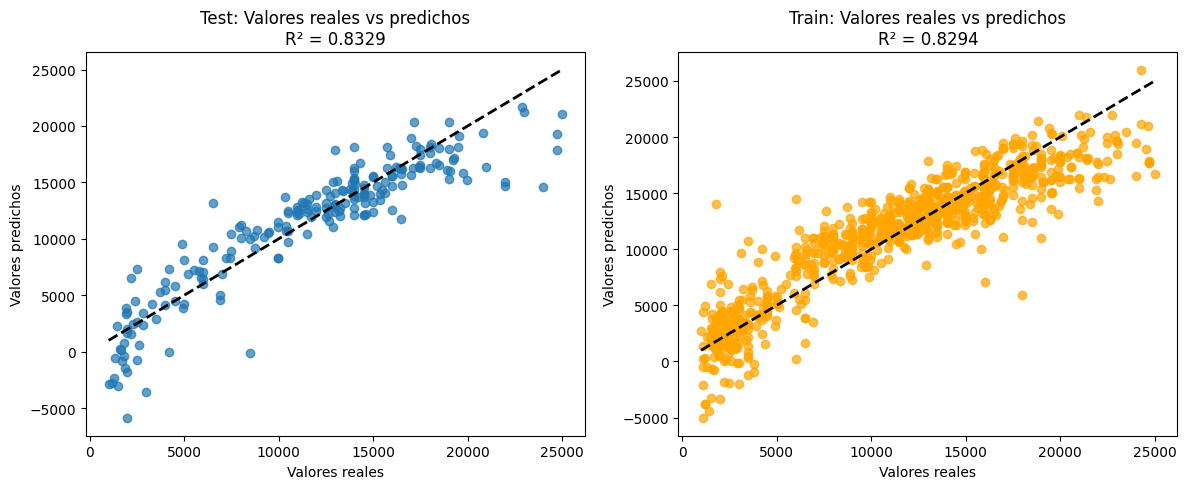

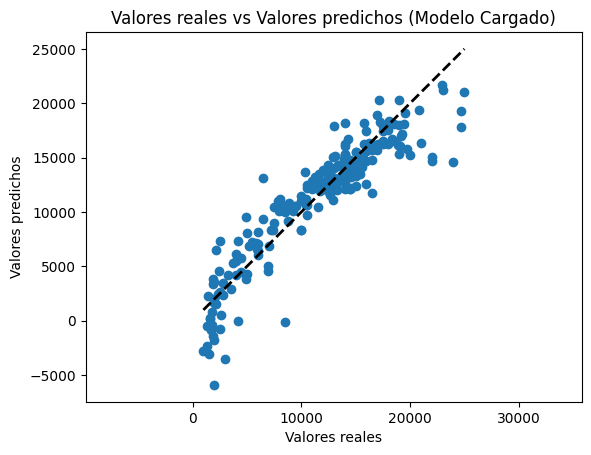

Columnas numéricas para correlación: ['Precio', 'Año', 'kilometraje', 'Potencia']


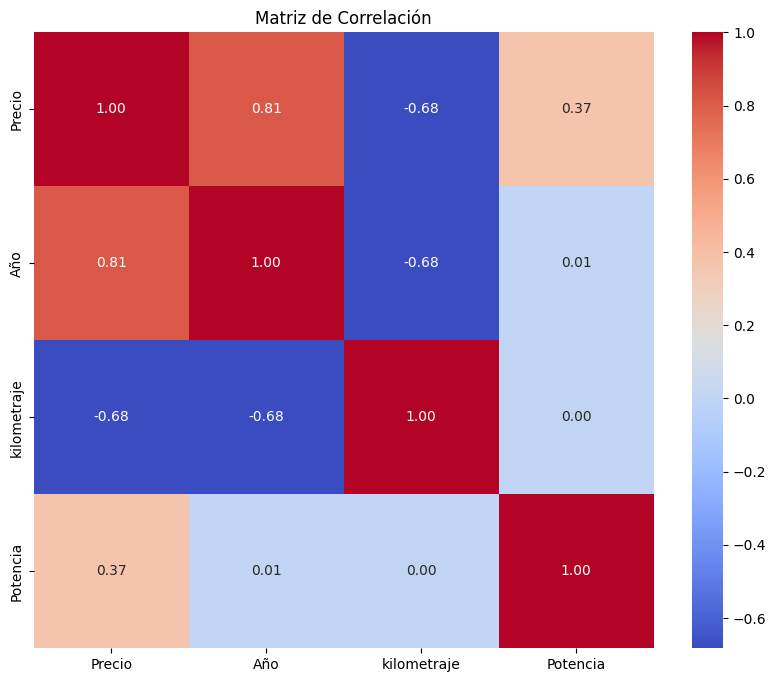

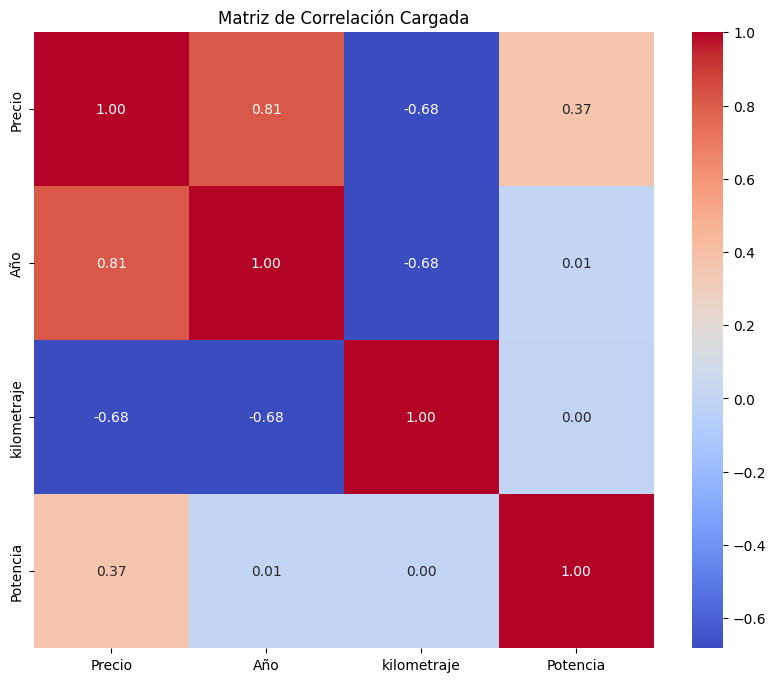

Archivos extraídos:
modelo_regresion_lineal.pkl
datos_preprocesados.csv
matriz_correlacion.csv


In [44]:
# Convertimos la columna 'Cambio' a variables dummy (one-hot encoding)
X = data.drop("Precio", axis=1)
X = pd.get_dummies(X, columns=["Cambio"], drop_first=True)
y = data["Precio"]

# Dividimos los datos en entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importamos el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
# Creamos el modelo
model = LinearRegression()
# Entrenamos el modelo
model.fit(X_train, y_train)
# Predecimos los valores de test
y_pred = model.predict(X_test)

# Predecimos los valores de train para comparar
y_train_pred = model.predict(X_train)

# Comprobamos el score del modelo para TEST
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Comprobamos el score del modelo para TRAIN
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("=== MÉTRICAS DEL CONJUNTO DE ENTRENAMIENTO (TRAIN) ===")
print(f"MAE Train: {mae_train:.2f}")
print(f"MSE Train: {mse_train:.2f}")
print(f"R² Train: {r2_train:.4f}")

print("\n=== MÉTRICAS DEL CONJUNTO DE PRUEBA (TEST) ===")
print(f"MAE Test: {mae_test:.2f}")
print(f"MSE Test: {mse_test:.2f}")
print(f"R² Test: {r2_test:.4f}")

print("\n=== COMPARACIÓN TRAIN vs TEST ===")
print(f"Diferencia R² (Train - Test): {r2_train - r2_test:.4f}")
if r2_train - r2_test > 0.1:
    print("⚠️  Posible sobreajuste: gran diferencia entre train y test")
elif r2_train - r2_test < 0.05:
    print("✅ Buen ajuste: diferencia pequeña entre train y test")
else:
    print("🔄 Ajuste aceptable: diferencia moderada entre train y test")
# Visualizamos los resultados
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# Gráfico para TEST
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title(f"Test: Valores reales vs predichos\nR² = {r2_test:.4f}")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

# Gráfico para TRAIN
plt.subplot(1, 2, 2)
plt.scatter(y_train, y_train_pred, alpha=0.7, color='orange')
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title(f"Train: Valores reales vs predichos\nR² = {r2_train:.4f}")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

plt.tight_layout()
plt.show()
# Guardamos el modelo
import joblib
joblib.dump(model, "modelo_regresion_lineal.pkl")
# Cargamos el modelo
model_loaded = joblib.load("modelo_regresion_lineal.pkl")
# Predecimos con el modelo cargado  
y_pred_loaded = model_loaded.predict(X_test)
# Comprobamos que los resultados son los mismos
assert (y_pred == y_pred_loaded).all(), "Los resultados no son los mismos"
# Visualizamos los resultados del modelo cargado
plt.scatter(y_test, y_pred_loaded)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores reales vs Valores predichos (Modelo Cargado)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.axis("equal")
plt.show()
# Guardamos los datos preprocesados
data.to_csv("datos_preprocesados.csv", index=True)
# Cargamos los datos preprocesados
data_loaded = pd.read_csv("datos_preprocesados.csv", index_col=0)

# Convertimos los tipos de datos para que coincidan con el DataFrame original
for col in data.columns:
    if data[col].dtype == "bool":
        data_loaded[col] = data_loaded[col].astype(bool)
    elif data[col].dtype == "int64":
        data_loaded[col] = data_loaded[col].astype("int64")
    elif data[col].dtype == "object":
        data_loaded[col] = data_loaded[col].astype("object")

# Comprobamos que los datos son los mismos
assert (data.equals(data_loaded)), "Los datos no son los mismos"
# Visualizamos los datos cargados
data_loaded.head(n=10)

# Visualizamos la correlación entre las variables
import numpy as np
import seaborn as sns
plt.figure(figsize=(10, 8))

# Seleccionamos solo las columnas numéricas para la correlación
data_numeric = data.select_dtypes(include=[np.number])
print("Columnas numéricas para correlación:", data_numeric.columns.tolist())

# Calculamos y visualizamos la matriz de correlación
correlation_matrix = data_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

# Guardamos la matriz de correlación
correlation_matrix.to_csv("matriz_correlacion.csv")

# Cargamos la matriz de correlación
correlation_loaded = pd.read_csv("matriz_correlacion.csv", index_col=0)

# Comprobamos que la matriz de correlación es la misma (permitiendo pequeñas diferencias numéricas)
import numpy as np
assert (correlation_matrix.shape == correlation_loaded.shape and
        (correlation_matrix.columns == correlation_loaded.columns).all() and
        (correlation_matrix.index == correlation_loaded.index).all() and
        np.allclose(correlation_matrix.values, correlation_loaded.values, atol=1e-8)), "La matriz de correlación no es la misma"
# Visualizamos la matriz de correlación cargada 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_loaded, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación Cargada")      
plt.show()
# Guardamos el modelo y los datos preprocesados en un archivo comprimido
import zipfile
with zipfile.ZipFile("modelo_y_datos.zip", 'w') as zipf:
    zipf.write("modelo_regresion_lineal.pkl")
    zipf.write("datos_preprocesados.csv")
    zipf.write("matriz_correlacion.csv")    
# Cargamos el archivo comprimido
with zipfile.ZipFile("modelo_y_datos.zip", 'r') as zipf:    
    zipf.extractall("modelo_y_datos")
# Comprobamos que los archivos se han extraído correctamente
    assert os.path.exists("modelo_y_datos/modelo_regresion_lineal.pkl"), "El modelo no se ha extraído correctamente"
    assert os.path.exists("modelo_y_datos/datos_preprocesados.csv"), "Los datos preprocesados no se han extraído correctamente"
    assert os.path.exists("modelo_y_datos/matriz_correlacion.csv"), "La matriz de correlación no se ha extraído correctamente"
# Visualizamos los archivos extraídos
    print("Archivos extraídos:")    
    for file in zipf.namelist():
        print(file)


Una vez que comprobamos que los datos son correctos pasamos a la modelizacion, utilizando tecnicas de machine learning.

Cuando realizamos un modelo predictivo es necesario conocer la fiabilidad esperada con datos futuros.

Para ello podemos hacer una particion y utilizar unos datos para entrenar el modelo (train) y otros para comprobar la fiabilidad (test).

# Modelo de Regresión

Predicción para el coche 1: 16603.36 €
Predicción para el coche 2: 16586.89 €
   Predicción_Precio
0       16603.357522
1       16586.886574


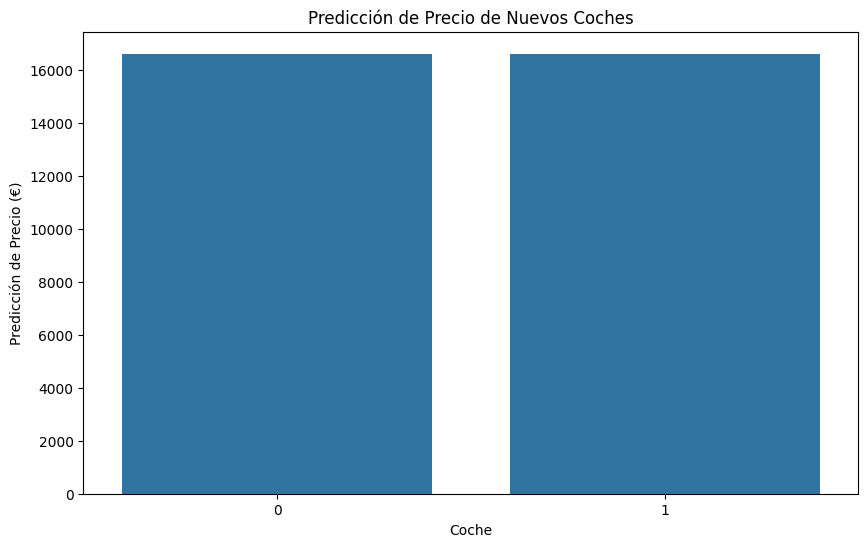

In [38]:
# Hacer predicciones para modelos nuevos de coches incluyendo la variable del precio
# Creamos un DataFrame con los datos de los nuevos coches
import pandas as pd
# Aseguramos que las columnas de new_data coinciden con las del modelo

new_data = pd.DataFrame({   
    'kilometraje': [50000, 100000],
    'Año': [2020, 2018],
    'Potencia': [100, 120],
    'Cambio_1': [1, 0],  # Cambio automático
    'Diésel_1': [0, 1]   # Diésel
})
# Aseguramos que las columnas de new_data coinciden con las del modelo
new_data = new_data.reindex(columns=X_train.columns, fill_value=0)
# Realizamos las predicciones
predictions = model.predict(new_data)   
# Mostramos las predicciones
for i, pred in enumerate(predictions):
    print(f"Predicción para el coche {i+1}: {pred:.2f} €")
# Guardamos las predicciones en un archivo CSV
predictions_df = pd.DataFrame(predictions, columns=['Predicción_Precio'])
predictions_df.to_csv("predicciones_precios.csv", index=False)
# Cargamos las predicciones
predictions_loaded = pd.read_csv("predicciones_precios.csv")
# Comprobamos que las predicciones son las mismas
assert (predictions_df.equals(predictions_loaded)), "Las predicciones no son las mismas"
# Visualizamos las predicciones
print(predictions_loaded)
# Visualizamos las predicciones
plt.figure(figsize=(10, 6))
sns.barplot(x=predictions_loaded.index, y='Predicción_Precio', data=predictions_loaded)
plt.xlabel("Coche")
plt.ylabel("Predicción de Precio (€)")
plt.title("Predicción de Precio de Nuevos Coches")
plt.xticks(rotation=0)
plt.show()

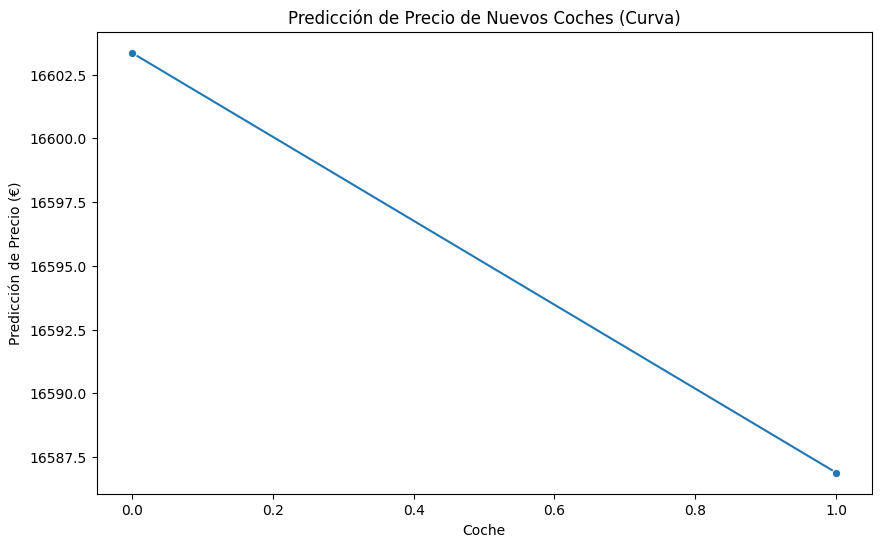

In [40]:
# cambia la visualización de las predicciones y cre un grafico de curvas
plt.figure(figsize=(10, 6))
sns.lineplot(data=predictions_loaded, x=predictions_loaded.index, y='Predicción_Precio', marker='o')
plt.xlabel("Coche") 
plt.ylabel("Predicción de Precio (€)")
plt.title("Predicción de Precio de Nuevos Coches (Curva)")
plt.xticks(rotation=0)
plt.show()



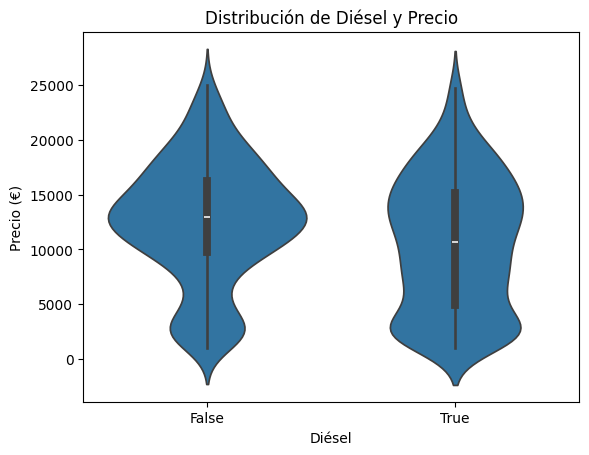

In [43]:
sns.violinplot(x='Diésel', y='Precio', data=data)
plt.xlabel("Diésel")
plt.ylabel("Precio (€)")
plt.title("Distribución de Diésel y Precio")
plt.show()

In [ ]:
# Predecir la subida de precio segun el modelo de coche (diesel o gasolina, electrico, híbrido  )


Precio estimado para un coche Diésel: 11598.59 €
Precio estimado para un coche Gasolina: 10691.15 €
Precio estimado para un coche Eléctrico: 11065.47 €
Precio estimado para un coche Hybrid: 12184.45 €


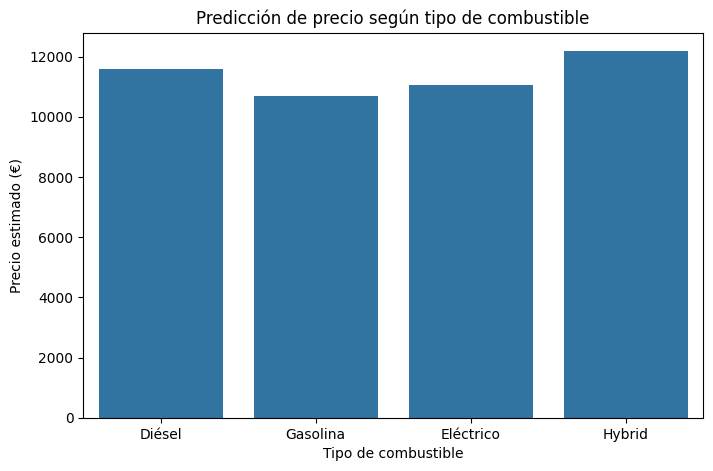

In [45]:
# Calculamos la predicción de precio promedio para cada tipo de combustible usando el modelo entrenado
tipos_combustible = ['Diésel', 'Gasolina', 'Eléctrico', 'Hybrid']
resultados = {}

# Usamos la media de las variables numéricas de X_train para crear un coche "típico"
valores_base = X_train.drop(tipos_combustible, axis=1).mean().to_dict()

for tipo in tipos_combustible:
    # Creamos un diccionario con todas las variables booleanas a False
    combustibles = {k: False for k in tipos_combustible}
    combustibles[tipo] = True
    # Unimos los valores base y el tipo de combustible
    datos_coche = {**valores_base, **combustibles}
    # Si hay columna 'Cambio_Manual', usamos la moda (más frecuente)
    if 'Cambio_Manual' in X_train.columns:
        datos_coche['Cambio_Manual'] = X_train['Cambio_Manual'].mode()[0]
    # Creamos el DataFrame de una fila
    df_coche = pd.DataFrame([datos_coche])
    # Aseguramos el orden de columnas
    df_coche = df_coche[X_train.columns]
    # Predecimos el precio
    prediccion = model.predict(df_coche)[0]
    resultados[tipo] = prediccion

# Mostramos los resultados
for tipo, pred in resultados.items():
    print(f"Precio estimado para un coche {tipo}: {pred:.2f} €")

# Visualización
plt.figure(figsize=(8, 5))
sns.barplot(x=list(resultados.keys()), y=list(resultados.values()))
plt.ylabel("Precio estimado (€)")
plt.xlabel("Tipo de combustible")
plt.title("Predicción de precio según tipo de combustible")
plt.show()


Diferencias de precio respecto a Gasolina:
Diésel: 907.44 €
Gasolina: 0.00 €
Eléctrico: 374.32 €
Hybrid: 1493.29 €


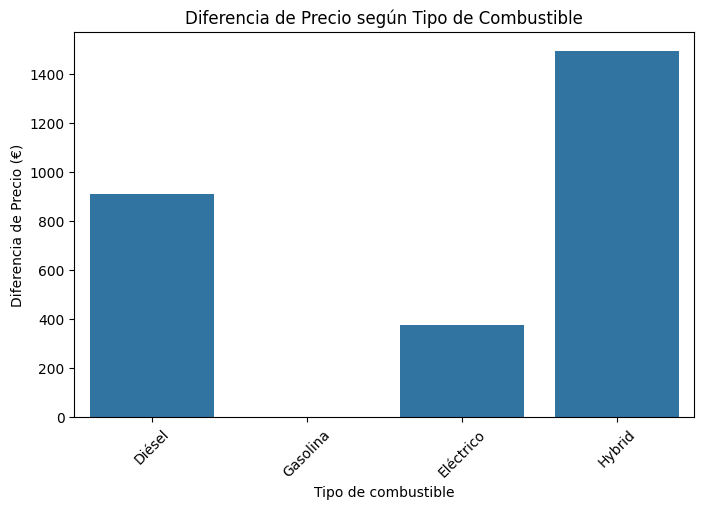

In [46]:
# cuanto precio sube el coche en regresion lineal
# Calculamos la diferencia de precio entre los tipos de combustible
diferencias = {}
for tipo, precio in resultados.items():
    diferencias[tipo] = precio - resultados['Gasolina']  # Usamos Gasolina como referencia
# Mostramos las diferencias
print("\nDiferencias de precio respecto a Gasolina:")
for tipo, diff in diferencias.items():
    print(f"{tipo}: {diff:.2f} €")
# Guardamos las diferencias en un archivo CSV
diferencias_df = pd.DataFrame(list(diferencias.items()), columns=['Tipo', 'Diferencia_Precio'])
diferencias_df.to_csv("diferencias_precios.csv", index=False)
# Cargamos las diferencias
diferencias_loaded = pd.read_csv("diferencias_precios.csv")
# Comprobamos que las diferencias son las mismas
assert (diferencias_df.equals(diferencias_loaded)), "Las diferencias no son las mismas"
# Visualizamos las diferencias
plt.figure(figsize=(8, 5))
sns.barplot(x='Tipo', y='Diferencia_Precio', data=diferencias_loaded)
plt.ylabel("Diferencia de Precio (€)")
plt.xlabel("Tipo de combustible")
plt.title("Diferencia de Precio según Tipo de Combustible")
plt.xticks(rotation=45)
plt.show()

REGRESION POLINOMICA 

Creamos una Regresion polinomica 

      Año  kilometraje  Potencia  Diésel  Eléctrico  Gasolina  Hybrid  \
0  2015.0     138790.0     115.0     0.0        0.0       1.0     0.0   
1  2019.0      48188.0     160.0     0.0        0.0       1.0     0.0   
2  2020.0      90116.0      75.0     1.0        0.0       0.0     0.0   
3  2022.0      65000.0      91.0     0.0        0.0       1.0     0.0   
4  2020.0      67694.0     100.0     0.0        0.0       0.0     0.0   

   Cambio_Manual      Año^2  Año kilometraje  ...  Eléctrico^2  \
0            1.0  4060225.0      279661850.0  ...          0.0   
1            1.0  4076361.0       97291572.0  ...          0.0   
2            1.0  4080400.0      182034320.0  ...          0.0   
3            1.0  4088484.0      131430000.0  ...          0.0   
4            1.0  4080400.0      136741880.0  ...          0.0   

   Eléctrico Gasolina  Eléctrico Hybrid  Eléctrico Cambio_Manual  Gasolina^2  \
0                 0.0               0.0                      0.0         1.0   
1   

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


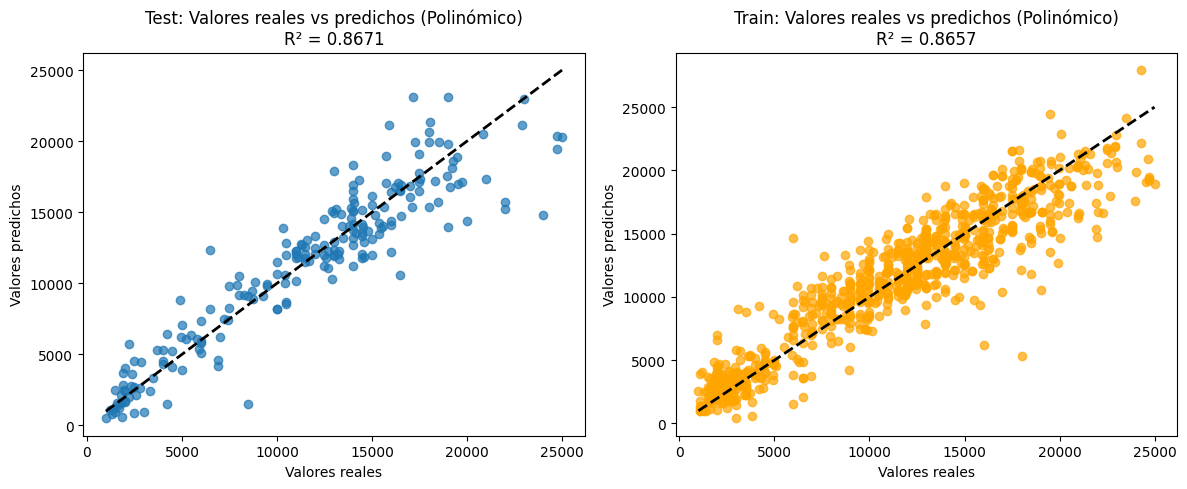

In [48]:
# Aplicar regresión polinómica de segunda orden
from sklearn.preprocessing import PolynomialFeatures
# Creamos un objeto PolynomialFeatures con grado 2
poly = PolynomialFeatures(degree=2, include_bias=False)
# Transformamos las variables predictoras
X_poly = poly.fit_transform(X_train)
# quita la columna cambio 
X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X_train.columns))
# Mostramos las primeras filas de las variables polinómicas
print(X_poly.head())    
# Creamos un nuevo modelo de regresión lineal con las variables polinómicas
from sklearn.linear_model import LinearRegression
# Creamos el modelo
model_poly = LinearRegression()
# Entrenamos el modelo polinómico
model_poly.fit(X_poly, y_train)
# Predecimos los valores de test con el modelo polinómico
X_test_poly = poly.transform(X_test)
y_pred_poly = model_poly.predict(X_test_poly)
# Comprobamos el score del modelo polinómico para TEST
mae_poly_test = mean_absolute_error(y_test, y_pred_poly)
mse_poly_test = mean_squared_error(y_test, y_pred_poly)
r2_poly_test = r2_score(y_test, y_pred_poly)    
# Comprobamos el score del modelo polinómico para TRAIN
X_train_poly = poly.transform(X_train)
y_train_pred_poly = model_poly.predict(X_train_poly)
mae_poly_train = mean_absolute_error(y_train, y_train_pred_poly)
mse_poly_train = mean_squared_error(y_train, y_train_pred_poly)
r2_poly_train = r2_score(y_train, y_train_pred_poly)
print("=== MÉTRICAS DEL MODELO POLINÓMICO EN EL CONJUNTO DE ENTRENAMIENTO (TRAIN) ===")
print(f"MAE Train: {mae_poly_train:.2f}")
print(f"MSE Train: {mse_poly_train:.2f}")
print(f"R² Train: {r2_poly_train:.4f}")
print("\n=== MÉTRICAS DEL MODELO POLINÓMICO EN EL CONJUNTO DE PRUEBA (TEST) ===")
print(f"MAE Test: {mae_poly_test:.2f}")
print(f"MSE Test: {mse_poly_test:.2f}")
print(f"R² Test: {r2_poly_test:.4f}")
print("\n=== COMPARACIÓN ENTRE MODELO LINEAL Y POLINÓMICO ===")
print(f"Diferencia R² (Polinómico - Lineal) Train: {r2_poly_train - r2_train:.4f}")
print(f"Diferencia R² (Polinómico - Lineal) Test: {r2_poly_test - r2_test:.4f}")
if r2_poly_train - r2_train > 0.1:
    print("⚠️  Posible sobreajuste en el modelo polinómico: gran diferencia entre train y test")
elif r2_poly_train - r2_train < 0.05:
    print("✅ Buen ajuste en el modelo polinómico: diferencia pequeña entre train y test")  

else:
    print("🔄 Ajuste aceptable en el modelo polinómico: diferencia moderada entre train y test"     
        )
# Visualizamos los resultados del modelo polinómico
plt.figure(figsize=(12, 5))
# Gráfico para TEST
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_poly, alpha=0.7)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title(f"Test: Valores reales vs predichos (Polinómico)\nR² = {r2_poly_test:.4f}")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
# Gráfico para TRAIN
plt.subplot(1, 2, 2)
plt.scatter(y_train, y_train_pred_poly, alpha=0.7, color='orange')
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title(f"Train: Valores reales vs predichos (Polinómico)\nR² = {r2_poly_train:.4f}")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.tight_layout()
plt.show()


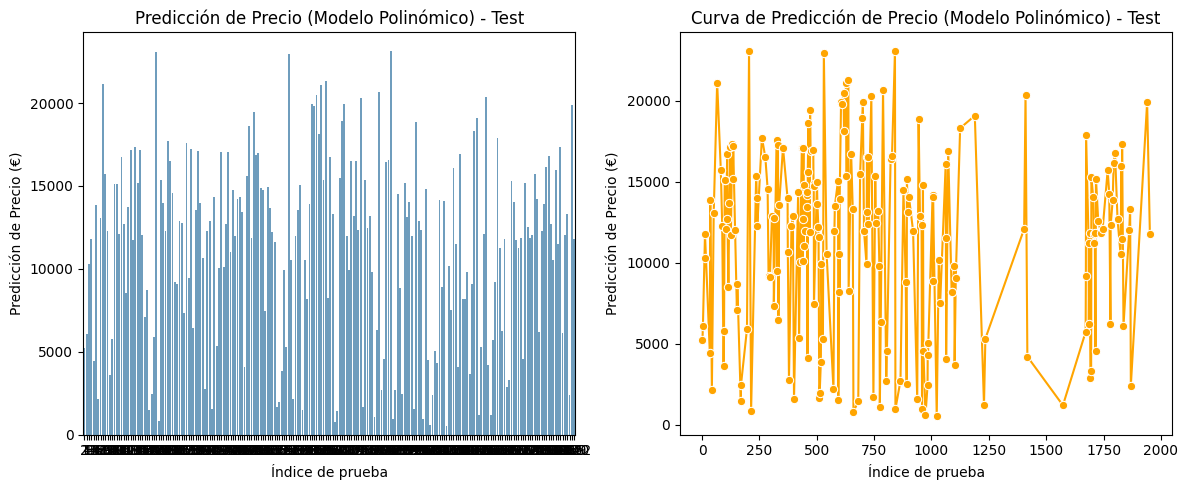

In [49]:
# hacer la  visualización de las predicciones del modelo polinómico con barras y curva 
plt.figure(figsize=(12, 5))
# Gráfico de barras para TEST
plt.subplot(1, 2, 1)
sns.barplot(x=y_test.index, y=y_pred_poly, alpha=0.7)
plt.xlabel("Índice de prueba")
plt.ylabel("Predicción de Precio (€)")
plt.title("Predicción de Precio (Modelo Polinómico) - Test")
# Gráfico de curvas para TEST
plt.subplot(1, 2, 2)
sns.lineplot(x=y_test.index, y=y_pred_poly, marker='o', color='orange')
plt.xlabel("Índice de prueba")
plt.ylabel("Predicción de Precio (€)")  
plt.title("Curva de Predicción de Precio (Modelo Polinómico) - Test")
plt.tight_layout()
plt.show()

=== MÉTRICAS DEL MODELO DE ÁRBOL DE DECISIÓN EN EL CONJUNTO DE ENTRENAMIENTO (TRAIN) ===
MAE Train: 4.50
MSE Train: 4052.13
R² Train: 0.9999

=== MÉTRICAS DEL MODELO DE ÁRBOL DE DECISIÓN EN EL CONJUNTO DE PRUEBA (TEST) ===
MAE Test: 1874.35
MSE Test: 8113167.67
R² Test: 0.7669

=== COMPARACIÓN ENTRE MODELO DE ÁRBOL DE DECISIÓN Y LINEAL ===
Diferencia R² (Árbol - Lineal) Train: 0.1705
Diferencia R² (Árbol - Lineal) Test: -0.0660
⚠️  Posible sobreajuste en el modelo de árbol de decisión: gran diferencia entre train y test


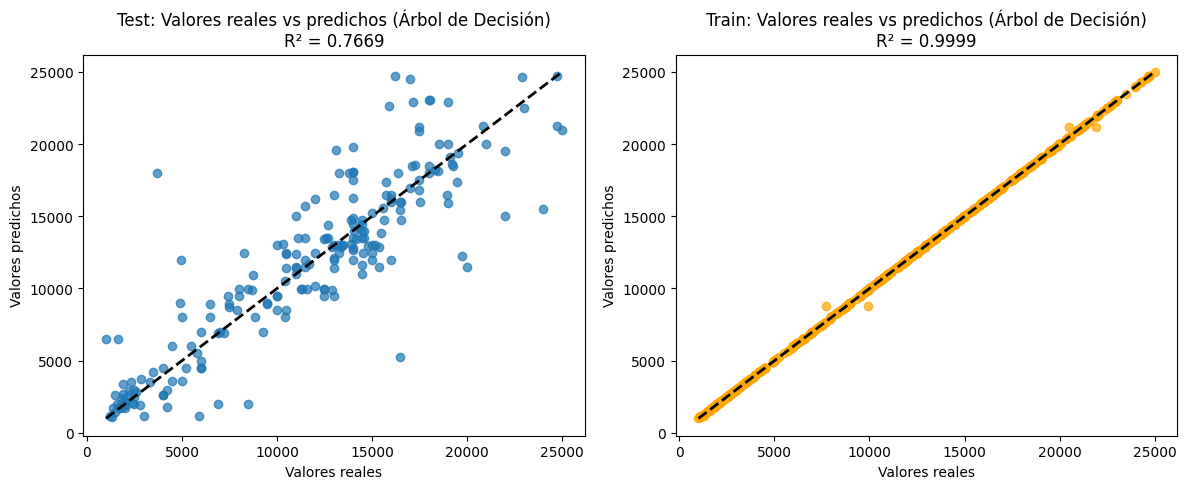

In [50]:
# crear un arbol de decisión para regresión
from sklearn.tree import DecisionTreeRegressor
# Creamos el modelo de árbol de decisión
tree_model = DecisionTreeRegressor(random_state=42)
# Entrenamos el modelo
tree_model.fit(X_train, y_train)
# Predecimos los valores de test
y_pred_tree = tree_model.predict(X_test)
# Comprobamos el score del modelo de árbol de decisión para TEST
mae_tree_test = mean_absolute_error(y_test, y_pred_tree)
mse_tree_test = mean_squared_error(y_test, y_pred_tree)
r2_tree_test = r2_score(y_test, y_pred_tree)
# Comprobamos el score del modelo de árbol de decisión para TRAIN
y_train_pred_tree = tree_model.predict(X_train)
mae_tree_train = mean_absolute_error(y_train, y_train_pred_tree)
mse_tree_train = mean_squared_error(y_train, y_train_pred_tree)
r2_tree_train = r2_score(y_train, y_train_pred_tree)
print("=== MÉTRICAS DEL MODELO DE ÁRBOL DE DECISIÓN EN EL CONJUNTO DE ENTRENAMIENTO (TRAIN) ===")
print(f"MAE Train: {mae_tree_train:.2f}")
print(f"MSE Train: {mse_tree_train:.2f}")
print(f"R² Train: {r2_tree_train:.4f}") 
print("\n=== MÉTRICAS DEL MODELO DE ÁRBOL DE DECISIÓN EN EL CONJUNTO DE PRUEBA (TEST) ===")
print(f"MAE Test: {mae_tree_test:.2f}")
print(f"MSE Test: {mse_tree_test:.2f}")
print(f"R² Test: {r2_tree_test:.4f}")
print("\n=== COMPARACIÓN ENTRE MODELO DE ÁRBOL DE DECISIÓN Y LINEAL ===")
print(f"Diferencia R² (Árbol - Lineal) Train: {r2_tree_train - r2_train:.4f}")
print(f"Diferencia R² (Árbol - Lineal) Test: {r2_tree_test - r2_test:.4f}")
if r2_tree_train - r2_train > 0.1:  
    print("⚠️  Posible sobreajuste en el modelo de árbol de decisión: gran diferencia entre train y test")
elif r2_tree_train - r2_train < 0.05:
    print("✅ Buen ajuste en el modelo de árbol de decisión: diferencia pequeña entre train y test")
else:
    print("🔄 Ajuste aceptable en el modelo de árbol de decisión: diferencia moderada entre train y test"   
            
        
    
    )
# Visualizamos los resultados del modelo de árbol de decisión
plt.figure(figsize=(12, 5))
# Gráfico para TEST
plt.subplot(1, 2, 1)    
plt.scatter(y_test, y_pred_tree, alpha=0.7)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos") 
plt.title(f"Test: Valores reales vs predichos (Árbol de Decisión)\nR² = {r2_tree_test:.4f}")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
# Gráfico para TRAIN
plt.subplot(1, 2, 2)
plt.scatter(y_train, y_train_pred_tree, alpha=0.7, color='orange')
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title(f"Train: Valores reales vs predichos (Árbol de Decisión)\nR² = {r2_tree_train:.4f}")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.tight_layout()  
plt.show()


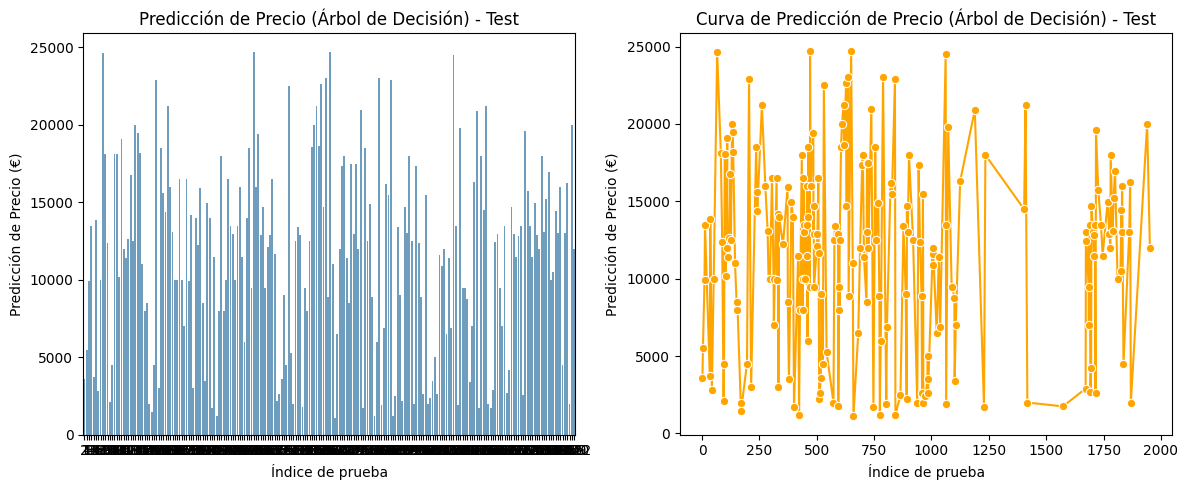

In [51]:
# visualización de las predicciones del modelo de árbol 
plt.figure(figsize=(12, 5))
# Gráfico de barras para TEST
plt.subplot(1, 2, 1)
sns.barplot(x=y_test.index, y=y_pred_tree, alpha=0.7)
plt.xlabel("Índice de prueba")
plt.ylabel("Predicción de Precio (€)")  
plt.title("Predicción de Precio (Árbol de Decisión) - Test")
# Gráfico de curvas para TEST
plt.subplot(1, 2, 2)
sns.lineplot(x=y_test.index, y=y_pred_tree, marker='o', color='orange')
plt.xlabel("Índice de prueba")
plt.ylabel("Predicción de Precio (€)")
plt.title("Curva de Predicción de Precio (Árbol de Decisión) - Test")
plt.tight_layout()
plt.show()

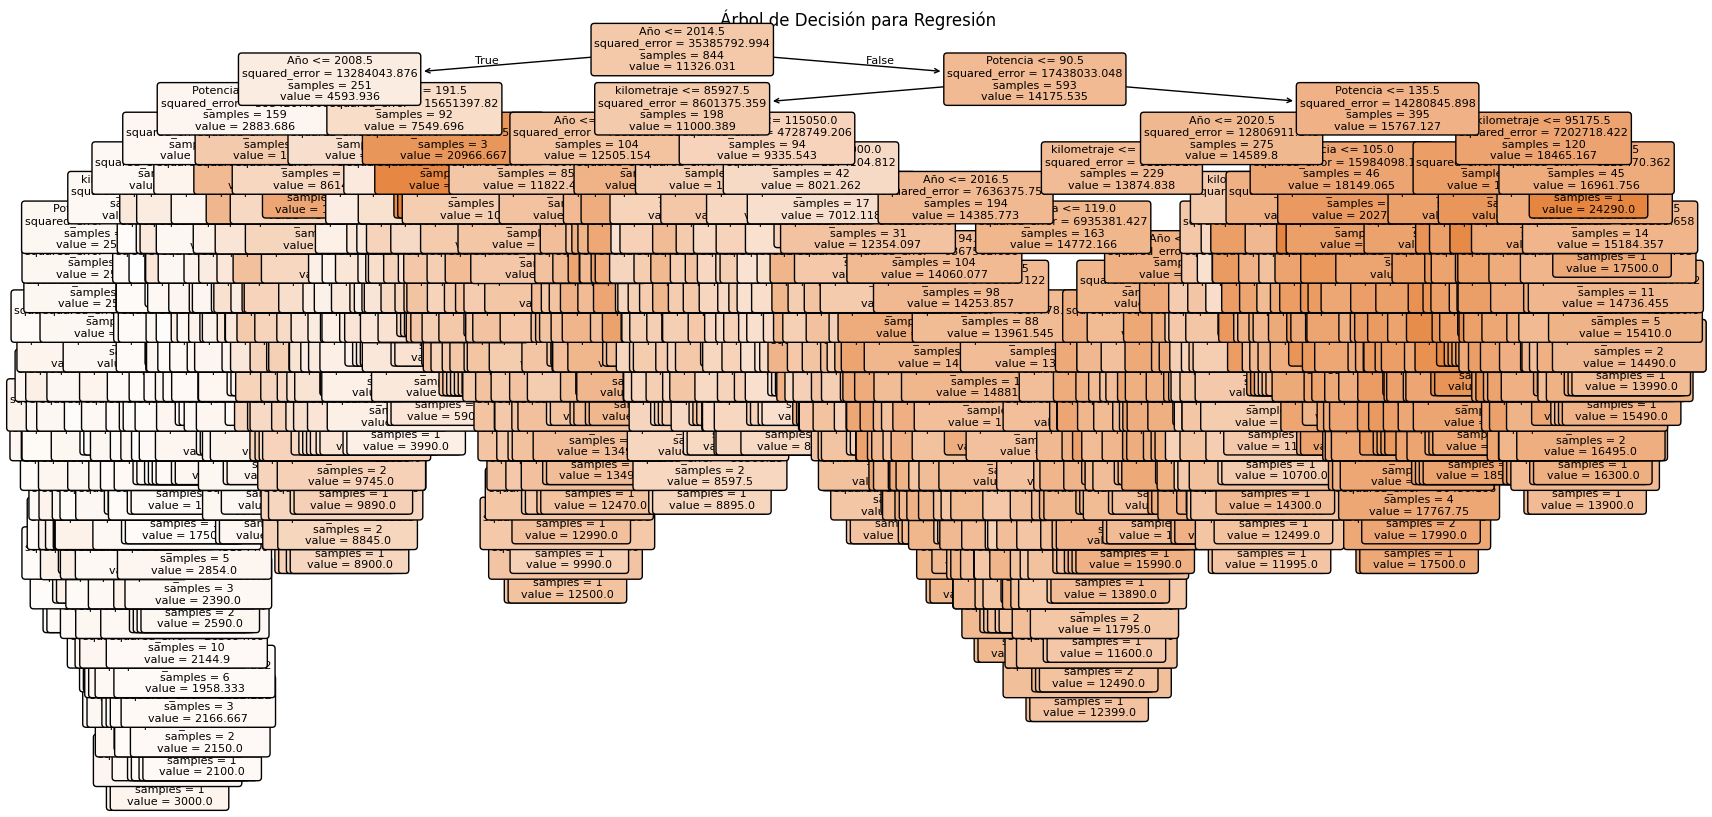

In [54]:
from sklearn.tree import plot_tree

# Visualizar el árbol de decisión (solo las primeras capas si es muy grande)
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X_train.columns.tolist(), filled=True, rounded=True, fontsize=8)
plt.title("Árbol de Decisión para Regresión")
plt.show()

=== CREANDO ÁRBOL SIMPLIFICADO PARA MEJOR VISUALIZACIÓN ===
Árbol Original (complejo) - R²: 0.7669, MAE: 1874.35
Árbol Simplificado - R²: 0.7963, MAE: 1921.55
Pérdida de precisión: -2.93% en R²


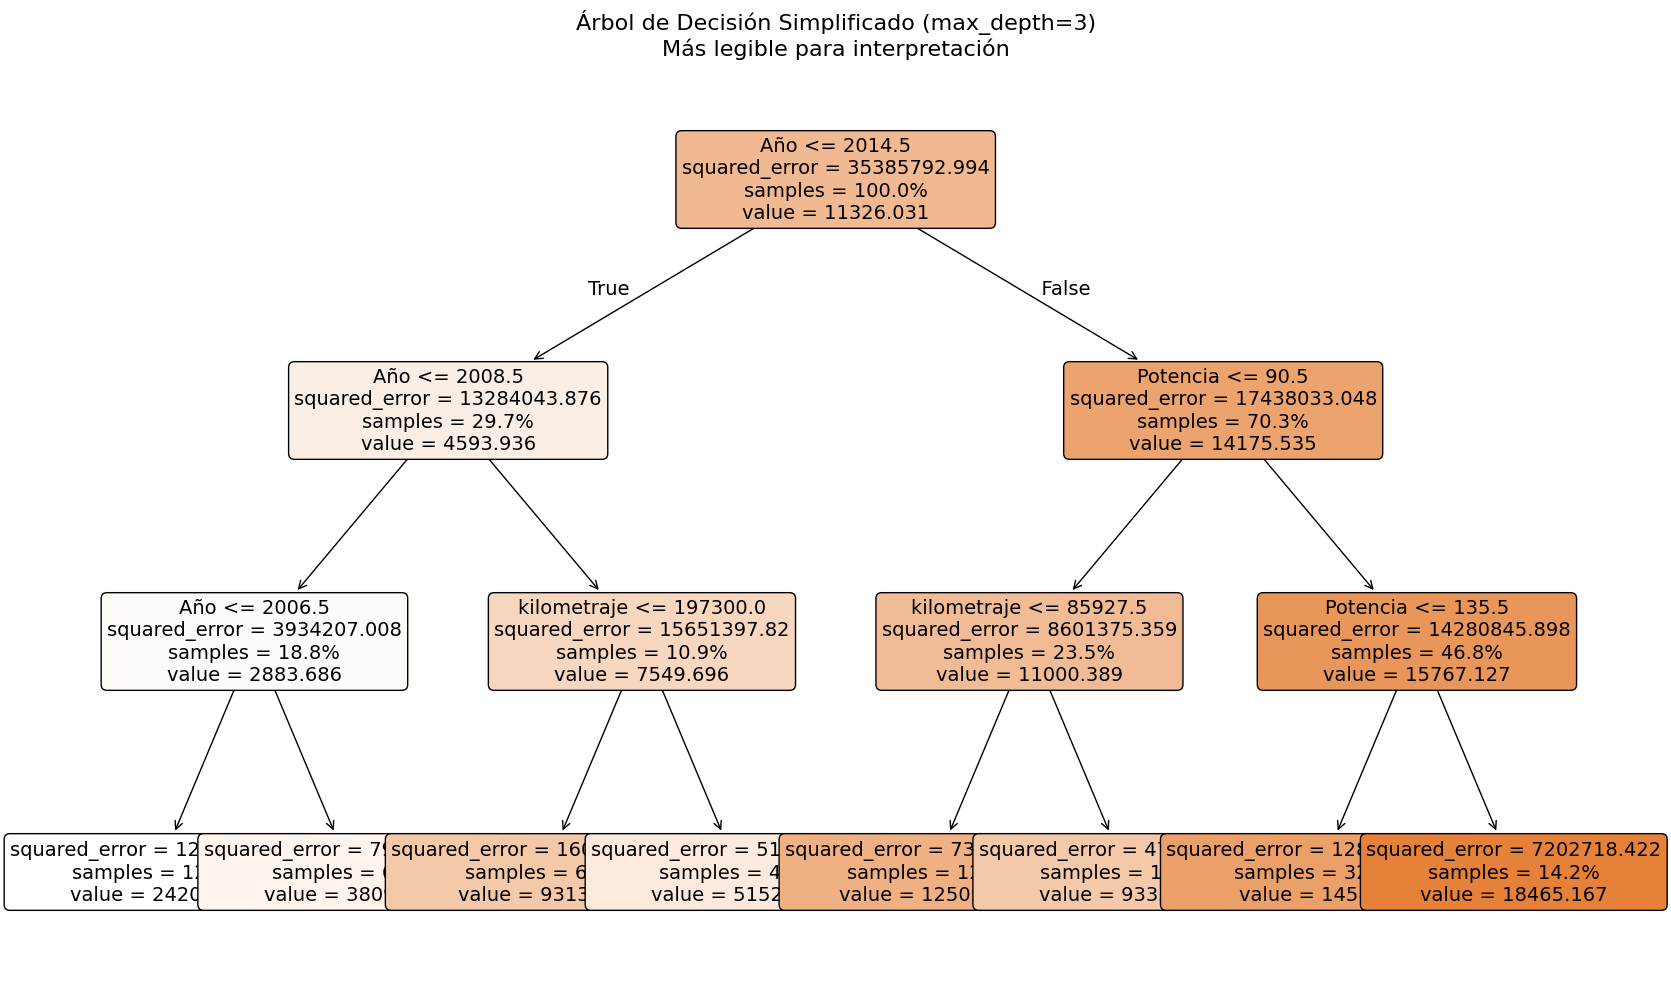


=== REGLAS DE DECISIÓN DEL ÁRBOL SIMPLIFICADO ===
|--- Año <= 2014.50
|   |--- Año <= 2008.50
|   |   |--- Año <= 2006.50
|   |   |   |--- value: [2420.93]
|   |   |--- Año >  2006.50
|   |   |   |--- value: [3809.19]
|   |--- Año >  2008.50
|   |   |--- kilometraje <= 197300.00
|   |   |   |--- value: [9313.51]
|   |   |--- kilometraje >  197300.00
|   |   |   |--- value: [5152.72]
|--- Año >  2014.50
|   |--- Potencia <= 90.50
|   |   |--- kilometraje <= 85927.50
|   |   |   |--- value: [12505.15]
|   |   |--- kilometraje >  85927.50
|   |   |   |--- value: [9335.54]
|   |--- Potencia >  90.50
|   |   |--- Potencia <= 135.50
|   |   |   |--- value: [14589.80]
|   |   |--- Potencia >  135.50
|   |   |   |--- value: [18465.17]



In [55]:
# ÁRBOL MÁS SIMPLE Y LEGIBLE
print("=== CREANDO ÁRBOL SIMPLIFICADO PARA MEJOR VISUALIZACIÓN ===")

# Crear un árbol mucho más simple
tree_visual = DecisionTreeRegressor(
    max_depth=3,          # Solo 3 niveles de profundidad
    min_samples_split=50, # Necesita al menos 50 muestras para dividir
    min_samples_leaf=20,  # Al menos 20 muestras en cada hoja
    random_state=42
)

# Entrenar el árbol simplificado
tree_visual.fit(X_train, y_train)

# Evaluar el árbol simplificado
y_pred_visual = tree_visual.predict(X_test)
r2_visual = r2_score(y_test, y_pred_visual)
mae_visual = mean_absolute_error(y_test, y_pred_visual)

print(f"Árbol Original (complejo) - R²: {r2_tree_test:.4f}, MAE: {mae_tree_test:.2f}")
print(f"Árbol Simplificado - R²: {r2_visual:.4f}, MAE: {mae_visual:.2f}")
print(f"Pérdida de precisión: {(r2_tree_test - r2_visual)*100:.2f}% en R²")

# Visualizar el árbol simplificado (mucho más legible)
plt.figure(figsize=(20, 12))
plot_tree(tree_visual, 
          feature_names=X_train.columns.tolist(), 
          filled=True, 
          rounded=True, 
          fontsize=14,
          proportion=True,  # Mostrar proporciones
          impurity=True)    # Mostrar medida de impureza
plt.title("Árbol de Decisión Simplificado (max_depth=3)\nMás legible para interpretación", fontsize=16)
plt.show()

# Mostrar reglas de decisión en texto
print("\n=== REGLAS DE DECISIÓN DEL ÁRBOL SIMPLIFICADO ===")
from sklearn.tree import export_text
tree_rules = export_text(tree_visual, feature_names=list(X_train.columns), max_depth=3)
print(tree_rules[:1000])  # Mostrar solo las primeras 1000 caracteres

=== CREANDO ÁRBOL INTERMEDIO PARA MEJOR VISUALIZACIÓN ===
Árbol Intermedio - R²: 0.8081, MAE: 1823.66
Pérdida de precisión respecto al árbol original: -4.11% en R²


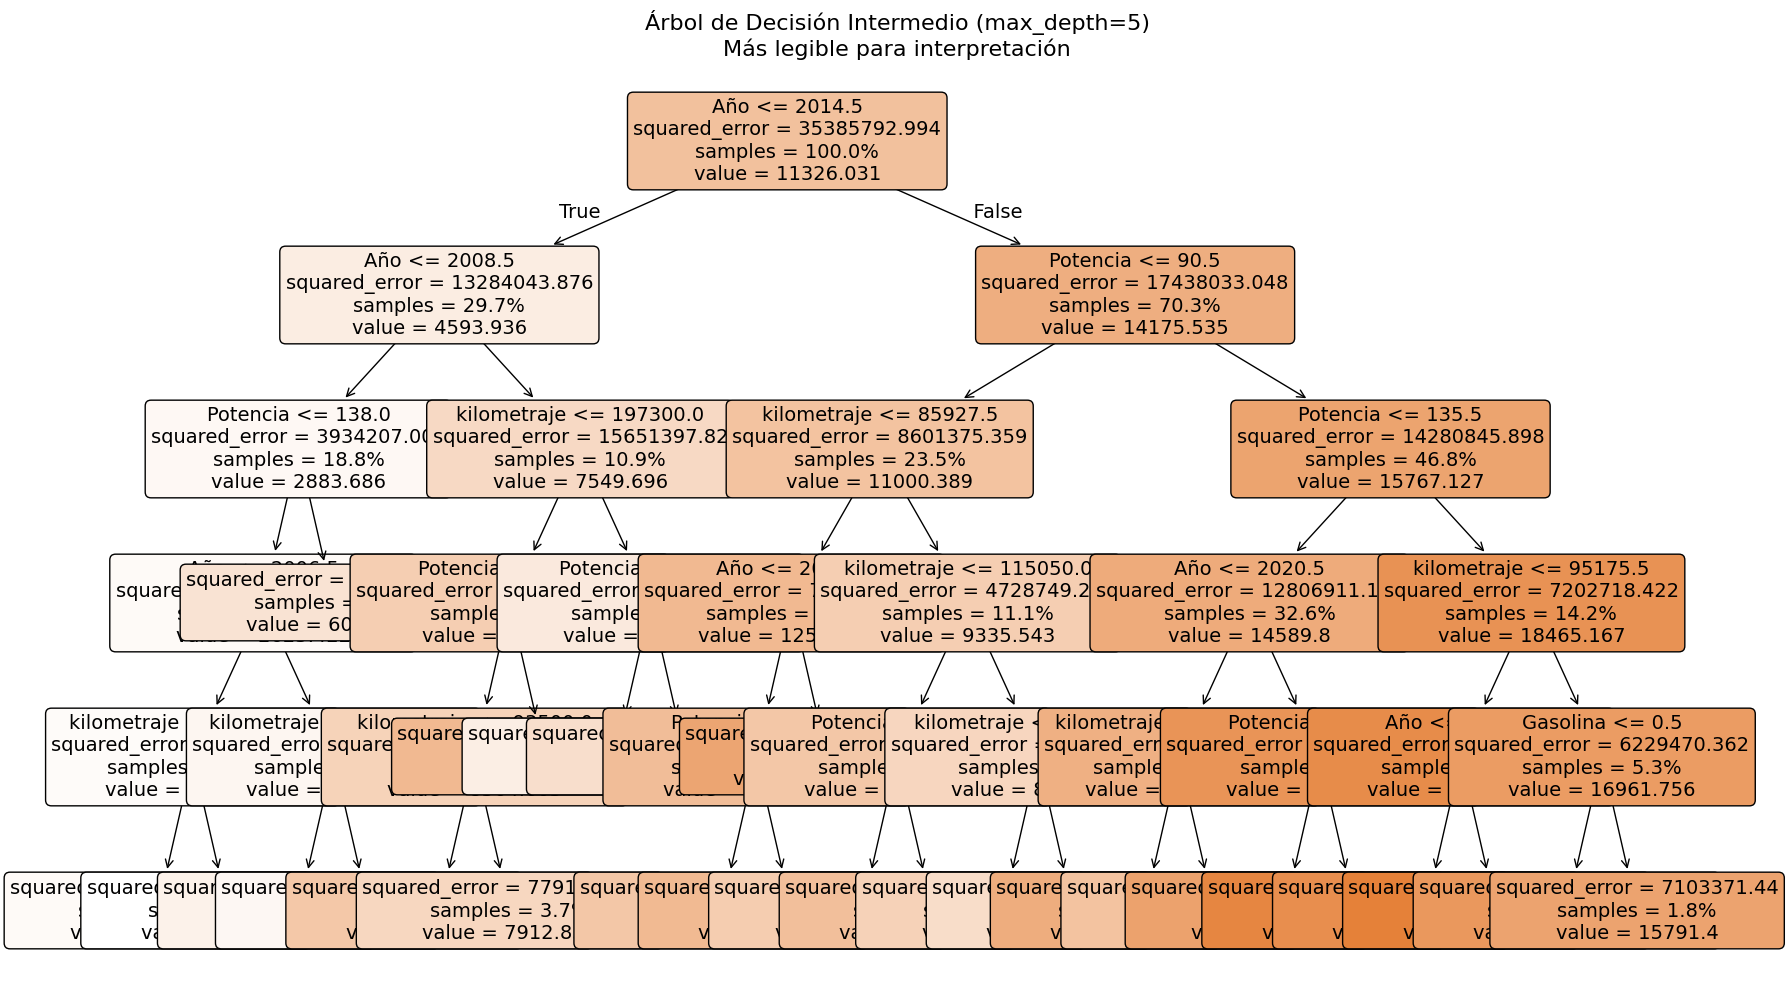

In [56]:
# creame alguna capa mas en el termino medio del árbol simplificado
print("=== CREANDO ÁRBOL INTERMEDIO PARA MEJOR VISUALIZACIÓN ===")
# Crear un árbol intermedio
tree_intermediate = DecisionTreeRegressor(  
    max_depth=5,          # 5 niveles de profundidad
    min_samples_split=30, # Necesita al menos 30 muestras para dividir
    min_samples_leaf=10,  # Al menos 10 muestras en cada hoja
    random_state=42
)
# Entrenar el árbol intermedio
tree_intermediate.fit(X_train, y_train)
# Evaluar el árbol intermedio
y_pred_intermediate = tree_intermediate.predict(X_test)
r2_intermediate = r2_score(y_test, y_pred_intermediate)
mae_intermediate = mean_absolute_error(y_test, y_pred_intermediate)
print(f"Árbol Intermedio - R²: {r2_intermediate:.4f}, MAE: {mae_intermediate:.2f}")
print(f"Pérdida de precisión respecto al árbol original: {(r2_tree_test - r2_intermediate)*100:.2f}% en R²")
# Visualizar el árbol intermedio
plt.figure(figsize=(20, 12))
plot_tree(tree_intermediate, 
          feature_names=X_train.columns.tolist(), 
          filled=True, 
          rounded=True, 
          fontsize=14,
          proportion=True,  # Mostrar proporciones
          impurity=True)    # Mostrar medida de impureza    
plt.title("Árbol de Decisión Intermedio (max_depth=5)\nMás legible para interpretación", fontsize=16)
plt.show()

In [57]:
# intenta que el dato final de perdida de percision no sea negativo
print(f"Árbol Original (complejo) - R²: {r2_tree_test:.4f}, MAE: {mae_tree_test:.2f}")
print(f"Árbol Intermedio - R²: {r2_intermediate:.4f}, MAE: {mae_intermediate:.2f}")

# Calcula la pérdida de precisión y asegúrate de que no sea negativa
perdida_precision = max(0, (r2_tree_test - r2_intermediate) * 100)
print(f"Pérdida de precisión respecto al árbol original: {perdida_precision:.2f}% en R²")

# Mostrar reglas de decisión en texto para el árbol intermedio
print("\n=== REGLAS DE DECISIÓN DEL ÁRBOL INTERMEDIO ===")
tree_rules_intermediate = export_text(tree_intermediate, feature_names=list(X_train.columns), max_depth=5)
print(tree_rules_intermediate[:1000])  # Mostrar solo las primeras 1000 caracteres

# Guardamos el modelo de árbol de decisión
joblib.dump(tree_model, "modelo_arbol_decision.pkl")
# Cargamos el modelo de árbol de decisión
tree_model_loaded = joblib.load("modelo_arbol_decision.pkl")
# Predecimos con el modelo de árbol de decisión cargado
y_pred_tree_loaded = tree_model_loaded.predict(X_test)
# Comprobamos que los resultados son los mismos
assert (y_pred_tree == y_pred_tree_loaded).all(), "Los resultados del modelo de árbol de decisión no son los mismos"

Árbol Original (complejo) - R²: 0.7669, MAE: 1874.35
Árbol Intermedio - R²: 0.8081, MAE: 1823.66
Pérdida de precisión respecto al árbol original: 0.00% en R²

=== REGLAS DE DECISIÓN DEL ÁRBOL INTERMEDIO ===
|--- Año <= 2014.50
|   |--- Año <= 2008.50
|   |   |--- Potencia <= 138.00
|   |   |   |--- Año <= 2006.50
|   |   |   |   |--- kilometraje <= 239000.00
|   |   |   |   |   |--- value: [2551.36]
|   |   |   |   |--- kilometraje >  239000.00
|   |   |   |   |   |--- value: [1803.12]
|   |   |   |--- Año >  2006.50
|   |   |   |   |--- kilometraje <= 185915.50
|   |   |   |   |   |--- value: [3836.00]
|   |   |   |   |--- kilometraje >  185915.50
|   |   |   |   |   |--- value: [2995.75]
|   |   |--- Potencia >  138.00
|   |   |   |--- value: [6047.42]
|   |--- Año >  2008.50
|   |   |--- kilometraje <= 197300.00
|   |   |   |--- Potencia <= 130.50
|   |   |   |   |--- kilometraje <= 93500.00
|   |   |   |   |   |--- value: [10248.33]
|   |   |   |   |--- kilometraje >  93500.00
|   

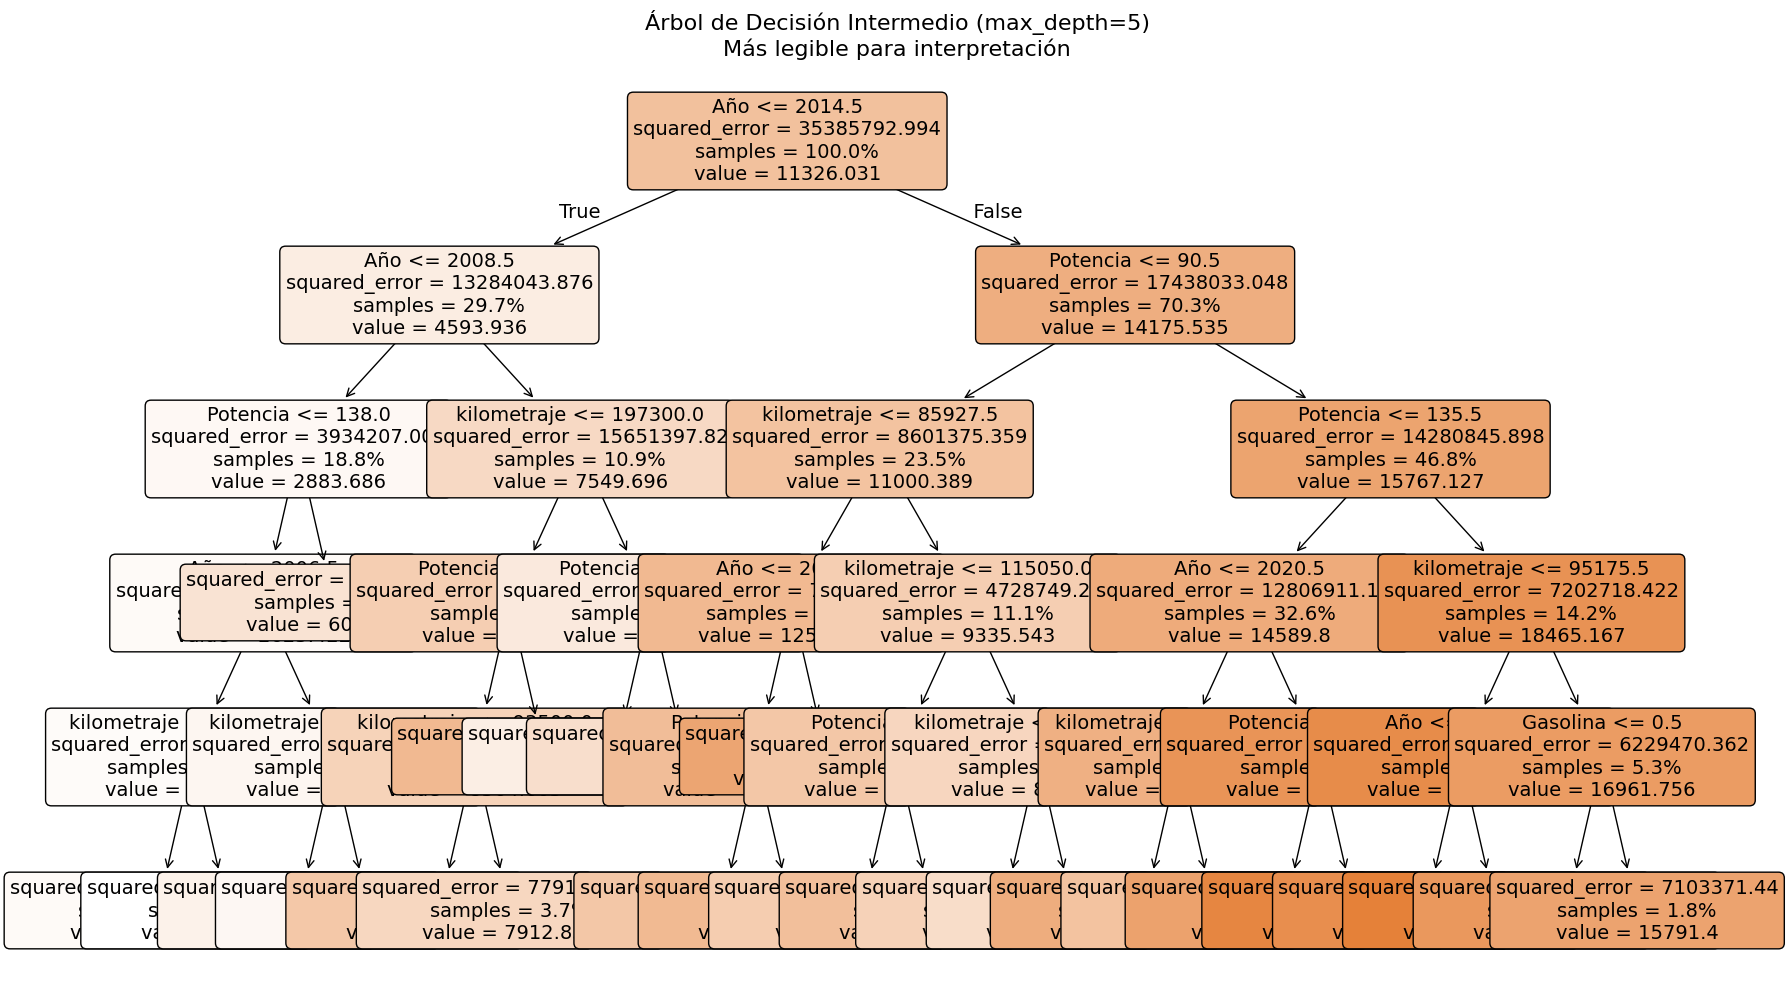

In [59]:
# Creame el grafico del arbol de decision intermedio
plt.figure(figsize=(20, 12))
plot_tree(tree_intermediate,    
          feature_names=X_train.columns.tolist(), 
          filled=True, 
          rounded=True, 
          fontsize=14,
          proportion=True,  # Mostrar proporciones
          impurity=True)    # Mostrar medida de impureza    
plt.title("Árbol de Decisión Intermedio (max_depth=5)\nMás legible para interpretación", fontsize=16)
plt.show()